In [110]:

from random import random, uniform
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats

In [111]:
class MonteCarloIntegral:
    def __init__(self, upper_limit=2, lower_limit=1,
                 number_of_series=200, number_of_iteration=500,
                 ):
        # upper_limit = верхний предел для интеграла
        # lower_limit - нижний пределе для интеграла
        # number_of_series - кол-во серий
        # number_of_iteration - кол-во имитаций в 1 серии
        # series_list - лист который содержит в себе все 200 вычисленных серий
        # list_of_series_deviation - список отклонений
        # math_expectation - мат.ожидание
        # variance - дисперсия        
        self.upper_limit = upper_limit
        self.lower_limit = lower_limit
        self.number_of_series = number_of_series
        self.number_of_iteration = number_of_iteration
        self.integral_practical_value = None
        self.series_list = []
        self.list_of_series_deviation = []
        self.math_expectation = None
        self.variance = None
        self.assymetry = None
        self.excess = None
        self.median = None

    # Генерация значения из пределов
    def generate_random_limit_value(self):
        return random() * math.fabs(self.upper_limit - self.lower_limit) + self.lower_limit

    # Вычисление одной подынтегральной функции
    def get_integral_function(self):
        return math.log(MonteCarloIntegral.generate_random_limit_value(self) - 1)
        
    # Вычисление интеграла для одной серии
    def calculate_integral(self):
        self.integral_practical_value = \
            (self.upper_limit - self.lower_limit) / self.number_of_iteration \
            * sum([self.get_integral_function() for _ in range(self.number_of_iteration)])
        return self.integral_practical_value

    # Серийное вычисление интеграла (200 серий по 500 вычислений)
    def get_series(self):
        self.series_list = [MonteCarloIntegral.calculate_integral(self) for _ in range(self.number_of_series)]
        return self.series_list            

    # Задание №2
    # Вычисление относительной погрешности в каждой серии
    def get_series_deviation(self):
        self.list_of_series_deviation = \
            [(-1 - MonteCarloIntegral.calculate_integral(self)) / (-1) for _ in range(self.number_of_series)]
        return self.list_of_series_deviation
    
    # Задание №3
    # Математическое ожидание для ошибки вычисляем по ЗБЧ
    def calculate_math_expectation(self):
        self.math_expectation = sum(self.list_of_series_deviation)/self.number_of_series
        return self.math_expectation
    
    # Дисперсия погрешности, стандартная формула
    def calculate_variance(self):
        self.variance = sum([(i - self.math_expectation)**2 for i in self.list_of_series_deviation])/self.number_of_series
        return self.variance       
    
    # Мода погрешности наиболее встречаемая величина
    def calculate_mod(self):
        round_list = list(map(lambda x: round(x, 2), self.list_of_series_deviation))
        max_count = 0
        mod = None
        for i in round_list:
            if round_list.count(i) > max_count:
                max_count = round_list.count(i)
                mod = i
        return (mod, max_count, round_list)
    
    # Медиана погрешности
    def calculate_median(self):
        sorted_list = sorted(self.list_of_series_deviation)
        length = int(self.number_of_series / 2)
        self.median = \
        (self.list_of_series_deviation[length] + self.list_of_series_deviation[length - 1]) /  2 
        return self.median
    
    # Коэффициент ассиметрии
    def calculate_asymmetry(self):
        self.assymetry = \
            sum([(i - self.math_expectation)**3 for i in self.list_of_series_deviation])/ \
            (self.number_of_series * self.variance**(3/2))
        return self.assymetry
    
    # Коэффициент эксцесса
    def calculate_excess(self):
        self.excess = \
            (sum([(i - self.math_expectation)**4 for i in self.list_of_series_deviation])/ \
            (self.number_of_series * self.variance**2)) - 3
        return self.excess        

# Задание 1

In [112]:
#Задание 1
#Провести численное вычисление интеграла методом Монте-Карло по 200 сериям,
#состоящим из 500 независимых имитаций. 

# Создаем экземпляр класса
M = MonteCarloIntegral()


In [113]:
# Серийное вычисление интеграла
print(M.get_series())

[-0.9770137615118735, -0.9491702020387066, -1.0208907011015165, -1.0813095989638173, -0.967050200912183, -0.9427436419047811, -0.9705986112092485, -1.013008974418379, -1.0170586228373102, -0.9864974036930335, -1.0075934397319526, -0.9919209719647497, -0.9183948368777529, -0.9931857754451322, -0.9934098264982206, -1.0262561652376687, -1.038250590319459, -1.044862597427719, -0.9703485749534014, -1.1036423164068168, -0.9378658414177379, -1.0432976805117264, -0.9877082049649307, -0.8821290114169055, -1.0434346985848275, -1.0496533801733698, -1.06502051945362, -1.055564332868343, -1.0021398184293042, -0.9893050990554255, -0.9935539131816932, -0.9923415267413351, -1.0273687015514577, -1.0011859903464007, -1.0707160444218393, -1.024750751848802, -1.042539422705199, -0.9707360560147138, -0.9798153505610194, -1.0661106290825362, -0.9885272465080711, -0.9735470020681134, -1.0222393761487794, -1.0287333865813397, -1.0396042224333466, -1.0234833814764834, -0.9699500796379689, -0.980430036917318, -

# Задание 2

In [114]:
# Серийное вычисление ошибок для интеграла
print(M.get_series_deviation())

[0.034582788963122724, -0.012608204456013183, 0.08037710390975339, 0.022465399992602553, -0.01753221878706901, -0.12080761609285151, -0.014140572640556348, 0.01980916086930029, 0.03747321875113829, -0.08790714019633894, -0.06824128021555986, -0.04653306596161744, -0.08918596428671588, 0.022644429672875166, 0.017447799416891008, -0.03530752529794712, 0.032285994452328715, 0.07396441863053749, -0.04321965976397579, 0.05164453287488113, 0.09055198447334623, -0.010121822203222441, -0.025120172929020024, -0.0012805286152837159, -0.03761313120706267, 0.016604965862045296, 0.05712296847617482, -0.008405019515574486, -0.01119093674603433, 0.0043147882559883, -0.007616157235347032, -0.019169991703498646, 0.055673137183859356, 0.06611676738907257, -0.003175226855079094, 0.07586738294100193, 0.04770562595604799, -0.033657372899564386, 0.09634971832696237, -0.05664021609394321, 0.0022760719340987334, 0.020043944928919255, -0.019810005738265968, 0.020587121032792477, 0.12066720993269597, -0.0031473

# Задание 3


In [115]:
# Вычисление мат.ожидания
print(M.calculate_math_expectation())

0.003953777353022244


In [116]:
# Вычисление дисперсии
print(M.calculate_variance())

0.002145047499585257


In [117]:
# Вычисление моды
print(f"Значение моды: {M.calculate_mod()[0]}\nКол-во вхождений: {M.calculate_mod()[1]}\nСписок: {M.calculate_mod()[2]}")


Значение моды: 0.02
Кол-во вхождений: 21
Список: [0.03, -0.01, 0.08, 0.02, -0.02, -0.12, -0.01, 0.02, 0.04, -0.09, -0.07, -0.05, -0.09, 0.02, 0.02, -0.04, 0.03, 0.07, -0.04, 0.05, 0.09, -0.01, -0.03, -0.0, -0.04, 0.02, 0.06, -0.01, -0.01, 0.0, -0.01, -0.02, 0.06, 0.07, -0.0, 0.08, 0.05, -0.03, 0.1, -0.06, 0.0, 0.02, -0.02, 0.02, 0.12, -0.0, -0.01, -0.03, 0.06, 0.01, 0.1, -0.01, 0.05, 0.06, 0.03, -0.02, 0.06, 0.05, 0.0, -0.07, -0.05, 0.02, 0.03, -0.05, 0.01, -0.02, -0.03, 0.03, 0.02, -0.04, -0.05, 0.01, 0.02, -0.05, 0.02, 0.0, 0.02, -0.05, -0.02, -0.02, -0.04, 0.04, 0.05, -0.02, -0.02, 0.02, 0.04, -0.0, 0.07, -0.01, 0.0, -0.05, 0.05, 0.01, -0.08, -0.01, -0.0, 0.06, -0.03, -0.06, 0.05, -0.08, -0.08, 0.05, -0.04, 0.05, 0.01, 0.04, 0.0, 0.01, 0.07, 0.03, -0.02, 0.01, 0.01, 0.04, -0.06, 0.02, -0.0, 0.01, -0.07, 0.07, 0.08, 0.0, -0.03, -0.01, -0.03, -0.05, 0.0, -0.03, 0.04, -0.01, -0.08, 0.03, -0.03, -0.04, -0.01, -0.05, -0.01, 0.07, 0.02, -0.07, -0.09, 0.04, 0.06, 0.01, 0.03, 0.1, -0.0, -0.

In [118]:
# Вычисление медианы
print(M.calculate_median())

-0.001467108347450452


In [119]:
# Вычисление коэффициента ассиметрии
print(M.calculate_asymmetry())

0.02621588167226185


In [120]:
# Вычисление коэффициента эксцесса
print(M.calculate_excess())

-0.2161186080939097


In [121]:
# Можно сделать вывод о том, что распределение близко к нормальному, т.к As,Ex Стремятся к нулю(близки к нулю)

# Задание 4


In [122]:
KS = 1 
for i in range(len(M.list_of_series_deviation)-1):
    if M.list_of_series_deviation[i] < 0 and M.list_of_series_deviation[i+1]>0:
        KS+=1
    elif M.list_of_series_deviation[i] > 0 and M.list_of_series_deviation[i+1]<0:
        KS+=1

n1 = len([i for i in M.list_of_series_deviation if i > 0])
n2 = len([i for i in M.list_of_series_deviation if i < 0])

mlty = 2*n1*n2
smy = n1 + n2

ch = (KS - mlty/smy - 1) - 0.5
zn = ((mlty*(mlty - smy))/((smy-1) * smy**2))**0.5

Z = ch/zn
Z

if(Z < 1.96):
    print('Нет оснований отвергать, что результаты представляют независимую повторную выборку')
else:
    print('Результаты нельзя считать независимой повторной выборкой')

Нет оснований отвергать, что результаты представляют независимую повторную выборку


# Задание 5

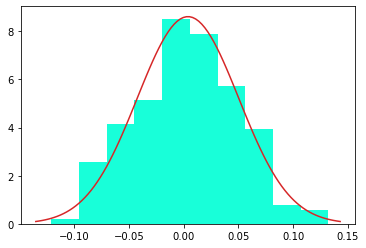

In [123]:
plt.hist(sorted(M.list_of_series_deviation), density=True, color='#18FFD9') 

mu = M.math_expectation
sigma = math.sqrt(M.variance)
# Линия - нормальное распределение с вычисленными коэффициентами
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma), color='C3')

plt.show()

# Задание 6

D:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


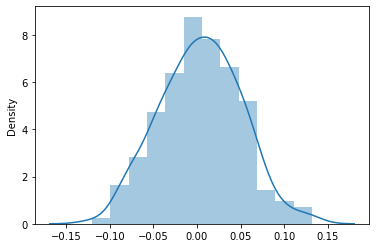

In [124]:
# График функции плотности для распределения
sns_plot = sns.distplot(sorted(M.list_of_series_deviation))

# Задание 7

In [125]:
# граница доверительного интервала при известной дисперсии
norm_deviation = 1.96 * (M.variance/(M.number_of_series*M.number_of_iteration))**0.5

In [126]:
# Доверительный интервал для мат. ожидания 
(M.math_expectation-norm_deviation, M.math_expectation+norm_deviation)

(0.0036667161317748115, 0.004240838574269676)

# Задание 8

In [127]:
# Проверка гипотезы о равенестве нулю мат.ожидания

In [128]:
# Статистика критерия для гипотезы о равенстве нулю мат.ожидания
U = ((M.number_of_series*M.number_of_iteration)**0.5)*M.math_expectation/(M.variance)**0.5
U
# не попало в критическую область следовательно нет оснований полагать, что мат. ожидание не равно нулю

26.995647751543583

# Задание 9

In [129]:
# Проверка гипотезы о нормальности распределения
val, p_value = scipy.stats.normaltest(M.list_of_series_deviation)
if p_value < 0.05:
    print("Нулевая гипотеза может быть отвергнута\nУровень значимости", p_value)
else:
    print("Нулевая гипотеза не может быть отвергнута\nУровень значимости", p_value)
    

Нулевая гипотеза не может быть отвергнута
Уровень значимости 0.879002916381221


In [130]:
n = len(M.list_of_series_deviation)
asm = M.calculate_asymmetry()
exc = M.calculate_excess()
JB = (n/6)*((asm)**2+((exc)**2)/4)

JB

0.4121361880988756

In [131]:
if JB > 5.991:
    print("Гипотеза о нормальном распределении отклоняется")
else:
    print("нет оснований полагать, что это распределение ненормальное")

нет оснований полагать, что это распределение ненормальное
